In [1]:
install.packages('igraph', repos='http://cran.us.r-project.org')

also installing the dependencies 'pkgmaker', 'registry', 'rngtools', 'gridBase', 'doParallel', 'NMF', 'irlba'



package 'pkgmaker' successfully unpacked and MD5 sums checked
package 'registry' successfully unpacked and MD5 sums checked
package 'rngtools' successfully unpacked and MD5 sums checked
package 'gridBase' successfully unpacked and MD5 sums checked
package 'doParallel' successfully unpacked and MD5 sums checked
package 'NMF' successfully unpacked and MD5 sums checked
package 'irlba' successfully unpacked and MD5 sums checked
package 'igraph' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\dima\AppData\Local\Temp\RtmpAXakVz\downloaded_packages


In [1]:
library(igraph)


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [78]:
q1 <- c('sex', 'necessary', 'relationship')
q2  <- c('sex', 'important', 'good', 'relationship')

df = read.table('eggs.csv')
names(df) <- c('q1', 'q2', 'sim')
#df['q1'] = paste0('q1_', df['q1'])
#df['q2'] = paste0('q2_', df['q2'])
df$q1 = paste0('1_',df$q1)
df$q2 = paste0('2_',df$q2)

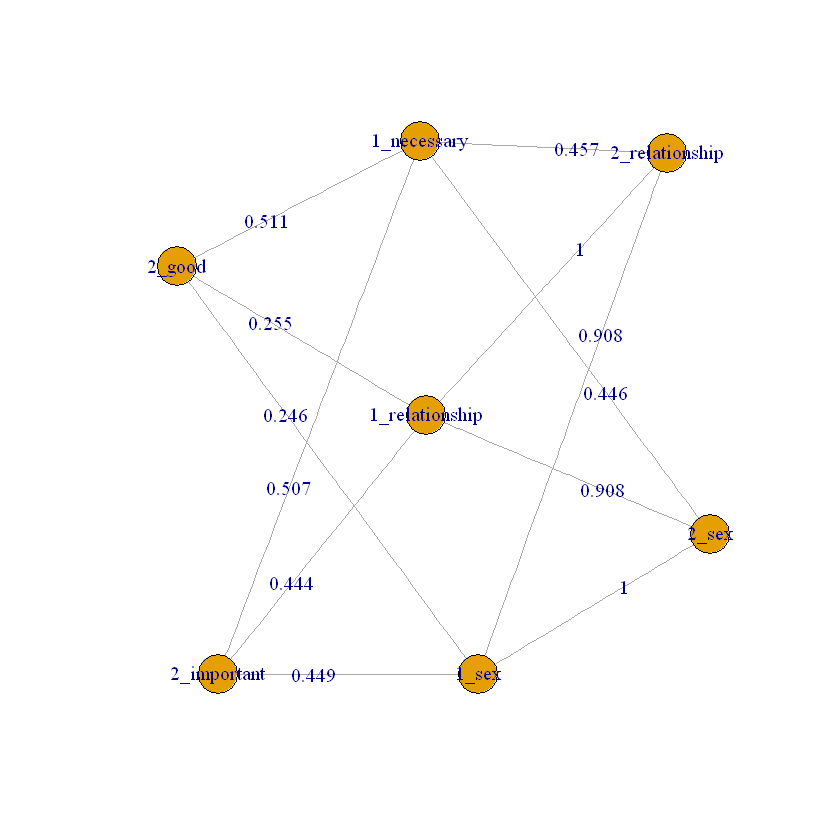

In [79]:
g2 <- graph_from_data_frame(df, directed = F, vertices = NULL)
g2 <- set_vertex_attr(g2, "type", value = c(rep(F, 3), rep(T, 4)))
E(g2)$label <- df$sim
#layout=layout.bipartite, 
plot(g2)

In [68]:
g2

IGRAPH UN-B 7 12 -- 
+ attr: name (v/c), type (v/l), sim (e/n)
+ edges (vertex names):
 [1] q1_sex         --q2_sex          q1_sex         --q2_important   
 [3] q1_sex         --q2_good         q1_sex         --q2_relationship
 [5] q1_necessary   --q2_sex          q1_necessary   --q2_important   
 [7] q1_necessary   --q2_good         q1_necessary   --q2_relationship
 [9] q1_relationship--q2_sex          q1_relationship--q2_important   
[11] q1_relationship--q2_good         q1_relationship--q2_relationship

In [91]:
#library(reshape)
reshape(df, direction="wide", idvar ='q1', v.names = "sim", timevar = "q2")

,q1,sim.2_sex,sim.2_important,sim.2_good,sim.2_relationship
1,1_sex,1.000,0.449,0.246,0.908
5,1_necessary,0.446,0.507,0.511,0.457
9,1_relationship,0.908,0.444,0.255,1.000


In [87]:
help(reshape)

In [118]:
del_l <- df$q1[df$sim == 1]
del_l2 <- df$q2[df$sim == 1]
df2 <- df[!(df$q1 %in% del_l) & !(df$q2 %in% del_l2),]
reshape(df2, direction="wide", idvar ='q1', v.names = "sim", timevar = "q2")

,q1,sim.2_important,sim.2_good
6,1_necessary,0.507,0.511


In [105]:
df2

,q1,q2,sim
2,1_sex,2_important,0.449
3,1_sex,2_good,0.246
4,1_sex,2_relationship,0.908
5,1_necessary,2_sex,0.446
6,1_necessary,2_important,0.507
7,1_necessary,2_good,0.511
8,1_necessary,2_relationship,0.457
9,1_relationship,2_sex,0.908
10,1_relationship,2_important,0.444
11,1_relationship,2_good,0.255
